### 1. Softmax regression with Keras:

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris   #아이리스 내부 데이터 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data and prepare:

In [2]:
# Read in the data.
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1,1)

#data로 설명변수
#target으로 종속변수

#세로방향으로 세움

- 세토사면 100, 벌지니카면 010으로 표현하는게 One-hot-encoding 
- 유형 가지수만큼 칼럼 만들어 해당 칼럼이면 1, 해당 칼럼 아니면 0
- 따라서 세토사 칼럼에 1이 한개만 있도록 해줌<br><br>

- 가변수화 할때는 설명변수에 대해서만 했는데 여기서는 반응변수를 One-hot-encoding
- 그래서 하나하나가 변수임

In [15]:
# One-hot-encoding for y.
y = to_categorical(y0, num_classes=3)

#명목형변수로 예측할때는 명목형 반응변수를 가지고 예측

#유형은 2가지 이상!!  
#num_classes=3하면 유형 3가지 나오도록
#유형가지수와  num_classes 일치시켜야 함

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
# View as DataFrame.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species_0', 'Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)

#원래는 반응변수 1개 설명변수 여러개였는데 이제는 반응변수 여러개임

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [5]:
# Scale the X data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#One-hot-encoding으로 만들어진거에 적용하면 안됨
#설명변수에만 적용 (x에만 적용)

In [6]:
# Split the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

#### 1.2. Define a Sequential API model:

In [7]:
# Add layers on a Sequential object.
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units = 3, activation="softmax"))    # units = N# of output variables.
                    #변수 4개랑 같아야 함

#변수가 x1,x2,x3,x4 4개 (페탈랭크,세팔랭크~)
#노드가 3개면 dense해서 12줄로 연결 됨

#x1이 노드 1,2,3
#x2가 노드 1,2,3

#서로 연결된 12줄 소프트맥스 통해 출력되어 p1, p2, p3가 됨
#p1은 세토사, p2는 세베, p3는 벌진의 확률임
#확률로 출력되므로 유형 가지수만큼 노드수(units)있어야 함 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# Summary of the model.
my_model.summary()

#3갈래로 출력됨
#4*3+3=15파라미터(변수 4개, 가중치3개, 개개 노드마다 바이러스가 하나씩 따라가니 3개 추가)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [9]:
# Hyperparameters.
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [10]:
# Define the optimizer and then compile.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#로지스틱이면 loss=binary~, optimizer는 시그모이드

#### 1.4. Train the model and visualize the history:

In [11]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

#validation_split = 0.2: 80대 20(train test)로 쪼갬

In [12]:
# View the keys.
my_summary.history.keys()

#train: acc, test: val_acc

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

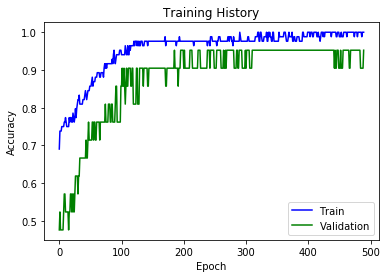

In [13]:
# Visualize the training history. 
n_skip = 10                 # Skip the first few steps.
plt.plot(my_summary.history['acc'][n_skip:], c="b")
plt.plot(my_summary.history['val_acc'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#train acc(파랑)이 더 좋게 나옴
#train이 낮아야 정상임: test가 좋게 나온다는건 train을 외워버린 것

#val_acc(초록)은 검증용으로 별도 준비해놨던거라 train봗 결과가 낮음. 20%로 test했기 때문
#지그재그인 이유는 데이터가 많지않아 개수때문에 올라갔다 내려갔다 한 것

#초록칸은 파랑칸의 4배임: train 80%, test 20%였기 때문에

#### 1.5. Testing: 

In [14]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.9330000281333923
